# CIS6800: Project 1a: Deep Learning Basics Part A

### Instructions:
* This is an individual assignment. Collaborating with others is not permitted.
* There is no single answer to most problems in deep learning, therefore the questions will often be underspecified. You need to fill in the blanks and submit a solution that solves the (practical) problem. Document the choices (hyperparameters, features, neural network architectures, etc.) you made where specified.
* All the code should be written in Python. You should only use PyTorch to complete this project.


### Setup

In [1]:
import torch
from torch import nn
import torchvision
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
rng_seed = 1144

# Download MNIST
torchvision.datasets.MNIST('.', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 52642142.42it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 21542894.15it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3257323.86it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6308122.11it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train

## Plot Loss and Gradient (20%)
In this part, you will write code to plot the output and gradient for a single neuron with
Sigmoid activation and two different loss functions. As shown in Figure 1, You should
implement a single neuron with input 1, and calculate different losses and corresponding
error.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig1.png" width=1200/></div>

<center>Figure 1: Network diagram for part 1.</center>

All the figures plotted in this part should have the same range of x-axis and y-axis. The
range should be centered at 0 but the extend should be picked so as to see the difference
clearly.

A set of example plots are provided in Figure 2. Here we use ReLU (instead of Sigmoid)
activation and L2 loss as an example.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig2.png" width=800/></div>

<center>Figure 2: Example plots with ReLU activation and L2 loss. Left: Output of ReLU function.
Middle: Loss plot with L2 loss. Right: Gradient plot.</center>

1. (3%) Plot a 3D figure showing the relations of output of Sigmoid function and weight/bias. To be specific, x-axis is weight, y-axis is bias, and z-axis is the out-put.

 Hint: Use the Python package matplotlib and the function plot surface from mpl toolkits.mplot3d
to draw 3D figures.

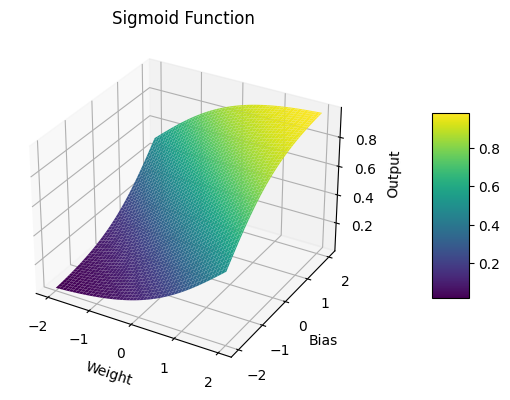

In [2]:
# import numpy as np

# def sigmoid(w, b, x):
#     return 1 / (1 + np.exp(-(w * x + b)))

# weight_range = np.linspace(-2, 2, 100)  # Range of weights
# bias_range = np.linspace(-2, 2, 100)    # Range of biases

# W, B = np.meshgrid(weight_range, bias_range)

# output = sigmoid(W, B, x=1)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# surf = ax.plot_surface(W, B, output, cmap='viridis')
# cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.15)
# # cbar.set_label('Output')

# ax.set_title("Sigmoid Function")
# ax.set_xlabel('Weight')
# ax.set_ylabel('Bias')
# ax.set_zlabel('Output')

# plt.show()

2. (3%) Experiment with L2 loss. The L2 loss is defined as $\mathcal{L}_{L2} = (\hat{y} - y)^2$, where $y$ is
the ground truth and $\hat{y}$ is the prediction. Let $y = 0.5$ and plot a 3D figure showing
2 the relations of L2 loss and weight/bias. To be specific, the x-axis is weight, y-axis is
bias, and z-axis is the L2 loss.

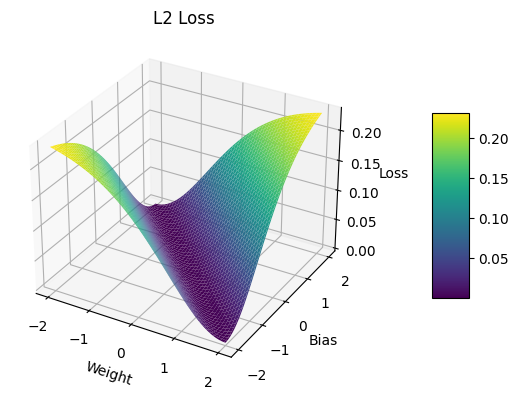

In [3]:
# import numpy as np

# def sigmoid(w, b, x):
#     return 1 / (1 + np.exp(-(w * x + b)))

# def l2_loss(y_hat, y):
#     return np.square(y_hat-y)

# weight_range = np.linspace(-2, 2, 100)  # Range of weights
# bias_range = np.linspace(-2, 2, 100)    # Range of biases

# W, B = np.meshgrid(weight_range, bias_range)

# y_hat = sigmoid(W, B, x=1)
# output = l2_loss(y_hat, y=0.5)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# surf = ax.plot_surface(W, B, output, cmap='viridis')
# cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.15)
# # cbar.set_label('Loss')

# ax.set_title("L2 Loss")
# ax.set_xlabel('Weight')
# ax.set_ylabel('Bias')
# ax.set_zlabel('Loss')

# plt.show()

3. (4%) Experiment with back-propagation with L2 loss. Compute $\frac{\partial \mathcal{L}_{L2}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

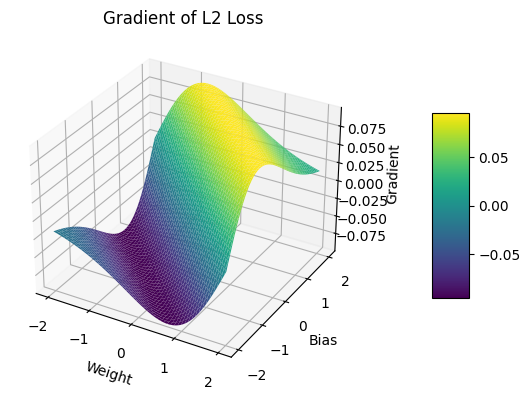

In [4]:
# import numpy as np

# def sigmoid(w, b, x):
#     return 1 / (1 + np.exp(-(w * x + b)))

# def l2_loss_gradient(y_hat, y, x):
#     return 2 * (y_hat - y) * y_hat * (1 - y_hat) * x


# weight_range = np.linspace(-2, 2, 100)  # Range of weights
# bias_range = np.linspace(-2, 2, 100)    # Range of biases

# W, B = np.meshgrid(weight_range, bias_range)

# y_hat = sigmoid(W, B, x=1)
# output = l2_loss_gradient(y_hat, y=0.5, x=1)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# surf = ax.plot_surface(W, B, output, cmap='viridis')
# cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.15)
# # cbar.set_label('Gradient')

# ax.set_title("Gradient of L2 Loss")
# ax.set_xlabel('Weight')
# ax.set_ylabel('Bias')
# ax.set_zlabel('Gradient')

# plt.show()

4. (3%) Experiment with cross-entropy loss. The cross-entropy loss is defined as $\mathcal{L}_{CE} = -(y \log{\hat{y}} + (1 - y)\log{(1 - \hat{y})})$, where $y$ is the ground truth probability and $\hat{y}$ is the
predicted probability. Let $y = 0.5$ and plot a 3D figure showing the relations of
cross-entropy loss and weight/bias. To be specific, the x-axis is weight, y-axis is bias,
and z-axis is the cross-entropy loss.

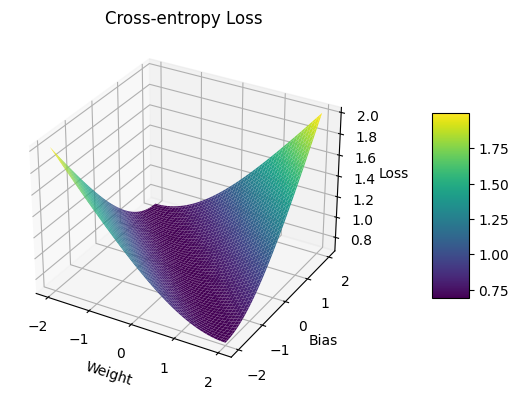

In [5]:
# import numpy as np

# def sigmoid(w, b, x):
#     return 1 / (1 + np.exp(-(w * x + b)))

# def ce_loss(y_hat, y):
#     return -(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# weight_range = np.linspace(-2, 2, 100)  # Range of weights
# bias_range = np.linspace(-2, 2, 100)    # Range of biases

# W, B = np.meshgrid(weight_range, bias_range)

# y_hat = sigmoid(W, B, x=1)
# output = ce_loss(y_hat, y=0.5)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# surf = ax.plot_surface(W, B, output, cmap='viridis')
# cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.15)
# # cbar.set_label('Loss')

# ax.set_title("Cross-entropy Loss")
# ax.set_xlabel('Weight')
# ax.set_ylabel('Bias')
# ax.set_zlabel('Loss')

# plt.show()

5. (4%) Experiment with back-propagation with cross-entropy loss. Compute $\frac{\partial \mathcal{L}_{CE}}{\partial \text{weight}}$ and plot a 3D figure showing the relations of gradient and weight/bias. To be specific, the x-axis is weight, y-axis is bias, and z-axis is the gradient w.r.t. weight.

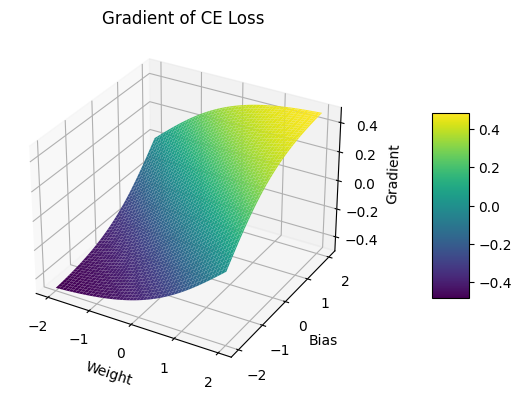

In [6]:
# import numpy as np

# def sigmoid(w, b, x):
#     return 1 / (1 + np.exp(-(w * x + b)))

# def ce_loss_gradient(y_hat, y, x):
#     return (y_hat - y) * x


# weight_range = np.linspace(-2, 2, 100)  # Range of weights
# bias_range = np.linspace(-2, 2, 100)    # Range of biases

# W, B = np.meshgrid(weight_range, bias_range)

# y_hat = sigmoid(W, B, x=1)
# output = ce_loss_gradient(y_hat, y=0.5, x=1)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# surf = ax.plot_surface(W, B, output, cmap='viridis')
# cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, pad=0.15)
# # cbar.set_label('Gradient')

# ax.set_title("Gradient of CE Loss")
# ax.set_xlabel('Weight')
# ax.set_ylabel('Bias')
# ax.set_zlabel('Gradient')

# plt.show()

6. (3%) Explain what you observed from the above 5 plots. The explanation should include:
 1. What's the difference between cross-entropy loss and L2 loss?
 2. What's the difference between the gradients from cross-entropy loss and L2 loss?
 3. Predict how these differences will influence the efficiency of learning.

MY ANSWER:

1.   L2 Loss is a measure of the squared difference between predicted values and actual values. The L2 loss surface forms a smooth, bowl-shaped structure with a minimum at the point where the model's predictions perfectly match the actual values. Cross-entropy Loss, on the other hand, measures the difference between the predicted probability distribution and the true distribution. The cross-entropy loss plot shows a sharper curvature compared to L2 loss, indicating it penalizes wrong predictions more steeply, particularly when the predicted probabilities diverge significantly from the actual labels.

2.   Gradient of L2 Loss is the slope of the loss function with respect to the weights and biases. It shows a smooth gradient field around the minimum, but with smaller gradients as it moves away from the origin. This indicates that the gradient will decrease as the weight and bias get further from the optimal point, leading to slower updates. Gradient of cross-entropy Loss is sharper and steeper in certain regions. The plot shows more significant changes in the gradient values compared to L2 loss. This means that the gradient from cross-entropy will push the model parameters more aggressively when the predictions are wrong, especially when the prediction is far from the true label.

3.   L2 Loss tends to result in slower convergence because its gradient diminishes more smoothly as the model parameters move away from the optimal point. This means that even if the model is making poor predictions, the updates to the weights and biases are relatively mild, leading to gradual improvements.
Cross-entropy loss, by contrast, leads to faster learning in classification tasks. The steeper gradients mean that when the model is making poor predictions, the updates to the parameters will be larger, accelerating the convergence towards the optimal weights and biases. However, this can also make cross-entropy loss more sensitive to large updates, which may cause instability in learning if the learning rate is not properly controlled.


## Solving XOR with a 2-layer Perceptron (20%)
In this question you are asked to build and visualize a 2-layer perceptron that computes
the XOR function. The network architecture is shown in Figure 3. The MLP has 1 hidden
layer with 2 neurons. The activation function used for the hidden layer is the hyperbolic
tangent function. Since we aim to model a boolean function the output of the last layer is
passed through a sigmoid activation function to constrain it between 0 and 1.

<div><img src="https://github.com/LukasZhornyak/CIS680_files/raw/e676f49897a77eb8d1774057e8ea5a216f0dc273/HW1/images/fig3.png" width=800/></div>

<center>Figure 3: Graphical representation of the 2-layer Perceptron</center>

1. (5%) Formulate the XOR approximation as an optimization problem using the cross
entropy loss. _Hint: Your dataset consists of just 4 points, $x_1 = (0,0)$, $x_2 = (0,1)$,
$x_3 = (1,0)$ and $x_4 = (1,1)$ with ground truth labels 0, 1, 1 and 0 respectively._

MY ANSWER:

1.&emsp;The dataset consists of 4 points $(x_1, x_2) = \{(0, 0), (0, 1), (1, 0), (1, 1)\}$ with corresponding labels $y_{true} = \{0, 1, 1, 0\}$.<br>

2.&emsp;The model consists of one hidden layer with 2 neurons using the **tanh** activation function and an output layer using the **sigmoid** activation function. The output is ${y} = \sigma(\hat{y})$, where:
$$\hat{y} = W_2 \cdot \tanh(W_1 \cdot x + b_1) + b_2$$

3.&emsp;The cross-entropy loss for binary classification is:
$$L_{CE} = -\frac{1}{4} \sum_{i=1}^{4} \left(  y_{true,i} \log({y}_i) + (1 - y_{true,i}) \log(1 - {y}_i) \right)$$

4.&emsp;The optimization problem is formulated as:
$$\min_{W_1, b_1, W_2, b_2} \, \left[ -\frac{1}{4} \sum_{i=1}^{4} \left(  y_{true,i} \log({y}_i) + (1 - y_{true,i}) \log(1 - \sigma(\hat{y}_i)) \right) \right]$$
where $\hat{y}_i = W_2 \cdot \tanh(W_1 \cdot x_i + b_1) + b_2$.

2. (10%) Use gradient descent to learn the network weights that optimize the loss. Intuitively, the 2 layer perceptron first performs a nonlinear mapping from $(x_1,x_2) \rightarrow (h_1,h_2)$ and then learns a linear classifier in the $(h_1,h_2)$ plane.

 For different steps during training visualize the image of each input point $x_i$ in the $(h_1,h_2)$ plane as well as the decision boundary (separating line) of the classifier.

Epoch 0, Loss: 3.0644


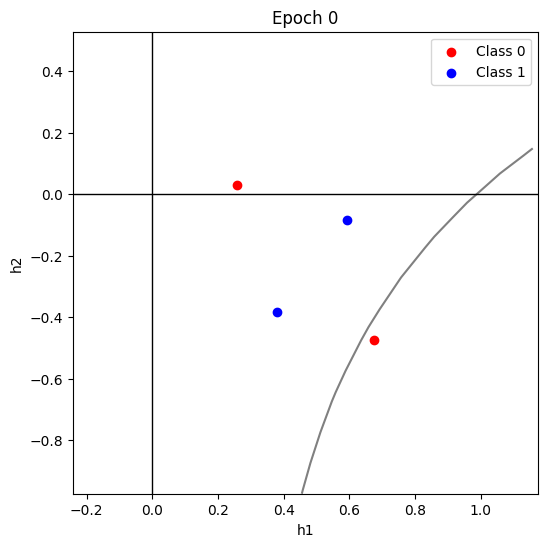

Epoch 100, Loss: 0.1247


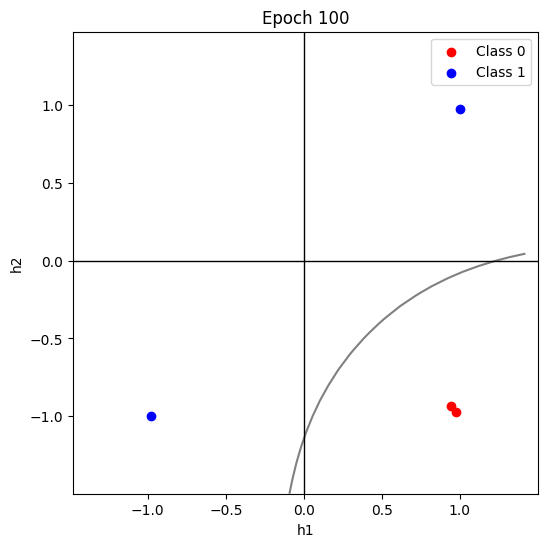

Epoch 200, Loss: 0.0351


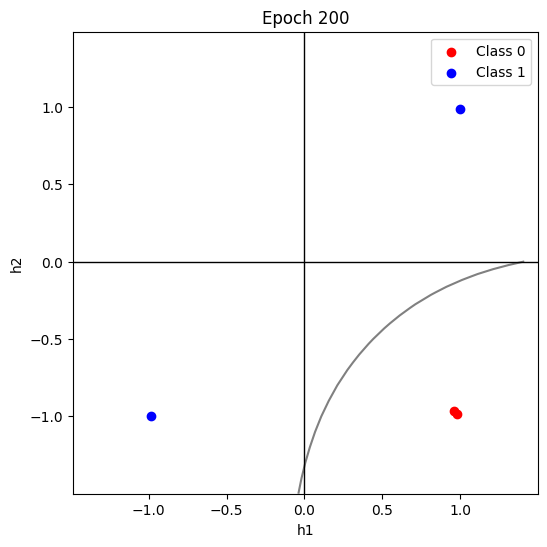

Epoch 300, Loss: 0.0172


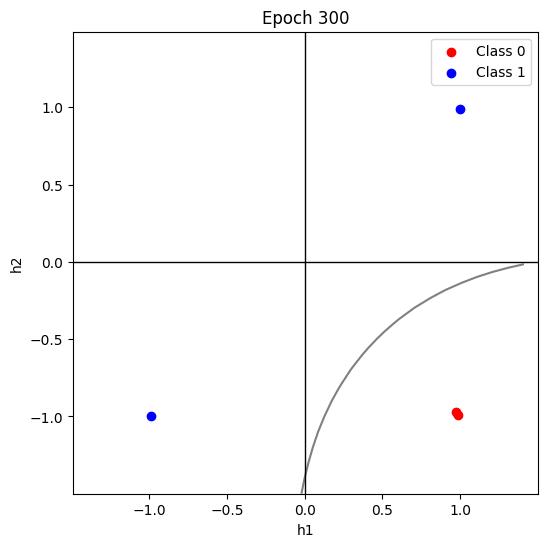

Epoch 400, Loss: 0.0102


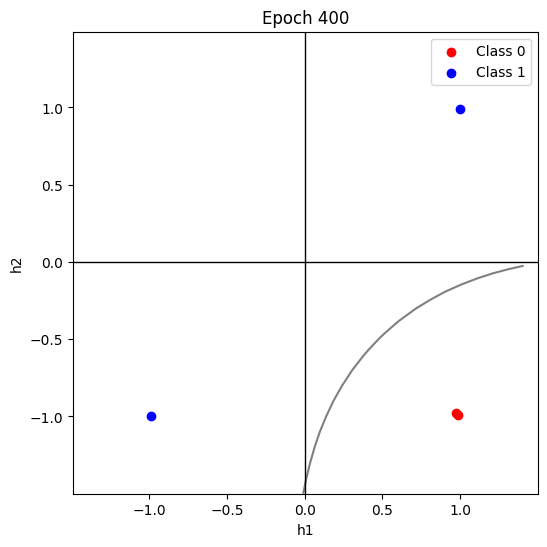

Epoch 500, Loss: 0.0067


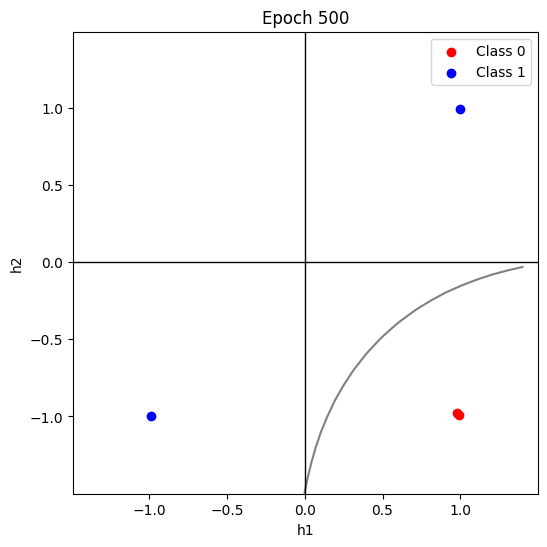

Epoch 600, Loss: 0.0047


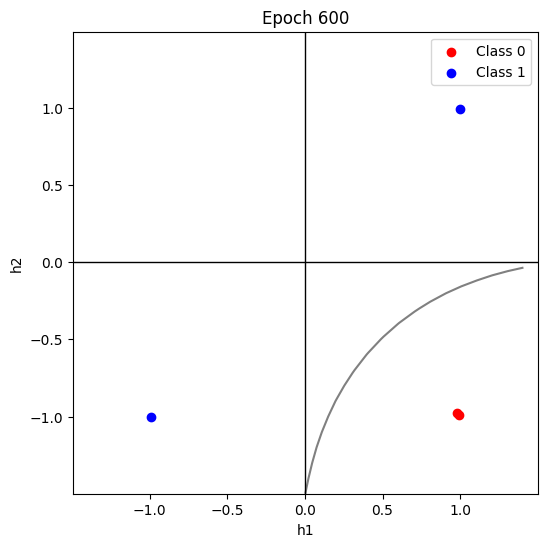

Epoch 700, Loss: 0.0034


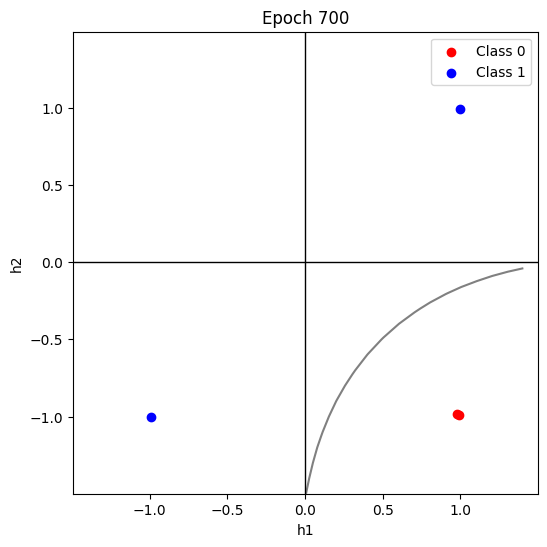

Epoch 800, Loss: 0.0026


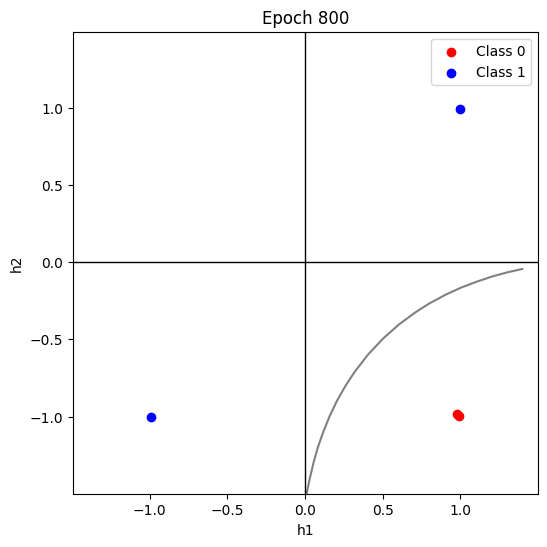

Epoch 900, Loss: 0.0020


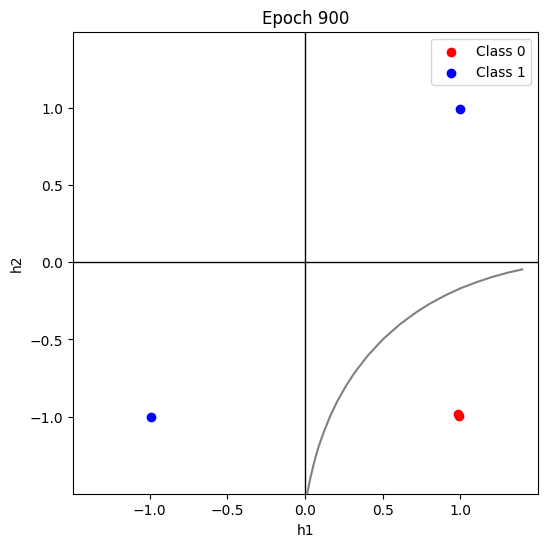

tensor([[2.1157e-04],
        [9.9950e-01],
        [9.9938e-01],
        [1.8236e-04]], grad_fn=<SigmoidBackward0>)


In [7]:
import torch.optim as optim
import numpy as np

# Make your dataset here
data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
labels = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

class XOR_Network(nn.Module):
    def __init__(self):
        super(XOR_Network, self).__init__()
        self.fc1 = nn.Linear(2, 2)
        self.fc2 = nn.Linear(2, 1)

    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

def plot_boundary(network, epoch):
    h_vals = []
    with torch.no_grad():
        for i in range(len(data)):
            h_hat = network.fc1(data[i])
            h = torch.tanh(h_hat)
            h_vals.append(h.numpy())

    h_vals = np.array(h_vals)

    scatter_class_0 = None
    scatter_class_1 = None

    plt.figure(figsize=(6, 6))
    for i in range(len(data)):
        if labels[i].item() == 0:
            scatter_class_0 = plt.scatter(h_vals[i, 0], h_vals[i, 1], color='red', label='Class 0' if i == 0 else "")
        else:
            scatter_class_1 = plt.scatter(h_vals[i, 0], h_vals[i, 1], color='blue', label='Class 1' if i == 0 else "")

    h1_min, h1_max = h_vals[:, 0].min() - 0.5, h_vals[:, 0].max() + 0.5
    h2_min, h2_max = h_vals[:, 1].min() - 0.5, h_vals[:, 1].max() + 0.5

    new_h1, new_h2 = np.meshgrid(np.arange(h1_min, h1_max, 0.1), np.arange(h2_min, h2_max, 0.1))
    new_h_grid = torch.tensor(np.c_[new_h1.ravel(), new_h2.ravel()], dtype=torch.float32)

    with torch.no_grad():
        new_h_hat_grid = torch.tanh(new_h_grid)
        decision_values = network.fc2(new_h_hat_grid)
        decision_values = torch.sigmoid(decision_values).detach().numpy().reshape(new_h1.shape)

    decision_boundary_line = plt.contour(new_h1, new_h2, decision_values, levels=[0.5], colors='gray')

    plt.axhline(0, color='black',linewidth=1)
    plt.axvline(0, color='black',linewidth=1)
    plt.xlim([h1_min, h1_max])
    plt.ylim([h2_min, h2_max])
    plt.title(f'Epoch {epoch}')
    plt.legend(handles=[scatter_class_0, scatter_class_1], loc='upper right', labels=['Class 0', 'Class 1'])
    plt.xlabel('h1')
    plt.ylabel('h2')
    plt.show()

# Make your network here
# network = XOR_Network()
# criterion = nn.BCELoss()
# optimizer = optim.Adam(network.parameters(), lr=0.1)

# # Train and plot here
# epochs = 1000
# for epoch in range(epochs):
#     epoch_loss = 0

#     for i in range(len(data)):
#         # Forward pass
#         output = network(data[i])
#         loss = criterion(output, labels[i])

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()

#     if epoch % 100 == 0:
#         print(f'Epoch {epoch}, Loss: {epoch_loss:.4f}')
#         plot_boundary(network, epoch)

# print(network(data))

3. (5%) What will happen if we don't use an activation function in the hidden layer? Is
the network be able to learn the XOR function? Justify your answer.

If we don’t use an activation function in the hidden layer, the network will not be able to learn the XOR function. This is because the XOR problem is non-linearly separable, and without a non-linear activation function, the network would behave as a linear model, which is insufficient to solve the XOR problem.

## Train a Convolutional Neural Network (30%)
In this part you will be asked to train a convolutional neural network on the MNIST
dataset.

1. (10%) Build a Convolutional Neural Network with architecture as shown below:

| Layers | Hyper-parameters |
| :--- | :--- |
| Covolution 1 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 1 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 2 | Kernel size $= (5, 5, 32)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 2 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Covolution 3 | Kernel size $= (5, 5, 64)$, SAME padding. Followed by BatchNorm and ReLU. |
| Pooling 3 | Average operation. Kernel size $= (2, 2)$. Stride $= 2$. Padding $= 0$. |
| Fully Connected 1 | Output channels $= 64$. Followed by BatchNorm and ReLU. |
| Fully Connected 2 | Output channels $= 10$. Followed by Softmax. |

In [12]:
import torch.nn.functional as F

# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")

# Create your network here (do not change this name)
class DigitClassification(torch.nn.Module):
    def __init__(self):
        super(DigitClassification, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding="same")
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding="same")
        self.bn2 = nn.BatchNorm2d(32)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding="same")
        self.bn3 = nn.BatchNorm2d(64)
        self.pool3 = nn.AvgPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 3 * 3, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.bn4(self.fc1(x)))
        x = F.log_softmax(self.fc2(x), dim=1)
        return x

# Instantiate your network here
model = DigitClassification().to(device)
print(model)

DigitClassification(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=same)
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=576, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


2. (15%) Train the CNN on the MNIST dataset using the Cross Entropy loss. Report training and testing curves. Your model should reach $99\%$ accuracy on the
test dataset. (Hint: Normalize the images in the $(-1,1)$ range and use the Adam
optimizer).

In [13]:
# import torchvision.transforms as transforms
# from torch.utils.data import DataLoader
# import torch.optim as optim

# # Where your trained model will be saved (and where the autograder will load it)
# model_path = 'model.pth'

# # Train your network here
# transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# train_dataset = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)
# test_dataset = torchvision.datasets.MNIST(root='.', train=False, download=True, transform=transform)

# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# num_epochs = 10
# train_losses = []
# train_accuracies = []
# test_losses = []
# test_accuracies = []
# for epoch in range(num_epochs):
#   print("Epoch %d/%d" % (epoch+1, num_epochs))

#   model.train()
#   running_loss = 0.0
#   correct = 0
#   total = 0

#   for batch_idx, (inputs, targets) in enumerate(train_loader):
#       inputs, targets = inputs.to(device), targets.to(device)

#       optimizer.zero_grad()

#       outputs = model(inputs)
#       loss = criterion(outputs, targets)

#       loss.backward()
#       optimizer.step()

#       running_loss += loss.item()
#       _, predicted = outputs.max(1)
#       total += targets.size(0)
#       correct += predicted.eq(targets).sum().item()

#   train_loss = running_loss / len(train_loader)
#   train_accuracy = 100. * correct / total
#   train_losses.append(train_loss)
#   train_accuracies.append(train_accuracy)
#   print(f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%')

#   model.eval()
#   test_loss = 0
#   correct = 0
#   total = 0

#   with torch.no_grad():
#       for inputs, targets in test_loader:
#           inputs, targets = inputs.to(device), targets.to(device)

#           outputs = model(inputs)
#           loss = criterion(outputs, targets)
#           test_loss += loss.item()

#           _, predicted = outputs.max(1)
#           total += targets.size(0)
#           correct += predicted.eq(targets).sum().item()

#   test_loss /= len(test_loader)
#   test_accuracy = 100. * correct / total
#   test_losses.append(test_loss)
#   test_accuracies.append(test_accuracy)
#   print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

#   # save model for each epoch
#   # model_path_temp = f'./model_epoch_{epoch+1}.pth'
#   # torch.save(model.state_dict(), model_path_temp)

# torch.save(model.state_dict(), "./model.pth")

Epoch 1/10
Train Loss: 0.1247, Train Accuracy: 97.72%
Test Loss: 0.0330, Test Accuracy: 99.06%
Epoch 2/10
Train Loss: 0.0349, Train Accuracy: 98.98%
Test Loss: 0.0357, Test Accuracy: 98.84%
Epoch 3/10
Train Loss: 0.0267, Train Accuracy: 99.17%
Test Loss: 0.0256, Test Accuracy: 99.21%
Epoch 4/10
Train Loss: 0.0226, Train Accuracy: 99.29%
Test Loss: 0.0231, Test Accuracy: 99.24%
Epoch 5/10
Train Loss: 0.0197, Train Accuracy: 99.36%
Test Loss: 0.0227, Test Accuracy: 99.24%
Epoch 6/10
Train Loss: 0.0160, Train Accuracy: 99.53%
Test Loss: 0.0205, Test Accuracy: 99.34%
Epoch 7/10
Train Loss: 0.0136, Train Accuracy: 99.58%
Test Loss: 0.0225, Test Accuracy: 99.26%
Epoch 8/10
Train Loss: 0.0125, Train Accuracy: 99.62%
Test Loss: 0.0204, Test Accuracy: 99.31%
Epoch 9/10
Train Loss: 0.0108, Train Accuracy: 99.66%
Test Loss: 0.0220, Test Accuracy: 99.16%
Epoch 10/10
Train Loss: 0.0099, Train Accuracy: 99.67%
Test Loss: 0.0189, Test Accuracy: 99.40%


[0.12466004909053921, 0.03492951859942953, 0.026671926164490753, 0.02259932828019373, 0.01969416043435686, 0.016047549693784274, 0.013559699062240506, 0.012452441343438448, 0.010777473657855268, 0.009948271939219825]
[97.72, 98.98, 99.16833333333334, 99.29333333333334, 99.365, 99.535, 99.575, 99.625, 99.655, 99.67]
[0.03298535021021962, 0.035737155750393865, 0.02558073718100786, 0.023086998052895068, 0.02270553526468575, 0.020505194272845983, 0.022505346755497157, 0.020382244465872647, 0.02204961208626628, 0.018869552903925068]
[99.06, 98.84, 99.21, 99.24, 99.24, 99.34, 99.26, 99.31, 99.16, 99.4]


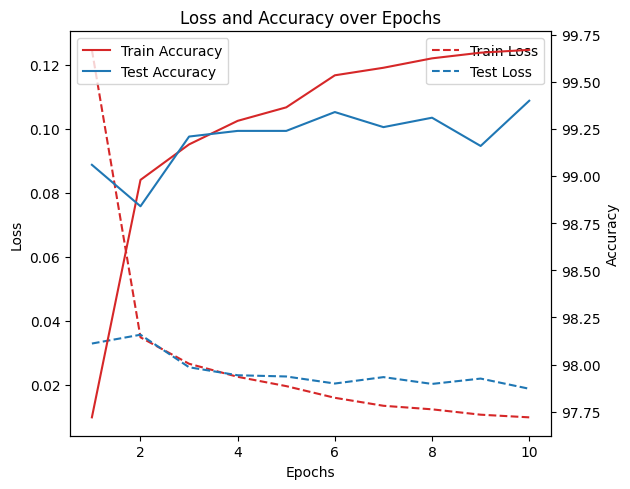

In [14]:
# print(train_losses)
# print(train_accuracies)
# print(test_losses)
# print(test_accuracies)

# epochs = list(range(1, num_epochs + 1))

# fig, ax1 = plt.subplots()
# color = 'black'

# ax1.set_xlabel('Epochs')
# ax1.set_ylabel('Loss', color=color)
# ax1.plot(epochs, train_losses, label="Train Loss", color='tab:red', linestyle='dashed')
# ax1.plot(epochs, test_losses, label="Test Loss", color='tab:blue', linestyle='dashed')
# ax1.tick_params(axis='y', labelcolor=color)
# plt.legend()

# ax2 = ax1.twinx()
# ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
# ax2.plot(epochs, train_accuracies, label="Train Accuracy", color='tab:red')
# ax2.plot(epochs, test_accuracies, label="Test Accuracy", color='tab:blue')
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()
# plt.title('Loss and Accuracy over Epochs')
# plt.legend()
# plt.show()

3. (5%) Report the training and testing curves and briefly summarise your implementation and training. Some things you may considering discussing, if appropriate:
 * Summarize your selection of hyperparameters.
 * Describe any issues or challenges you had with your implementation.
 * Note any interesting observations you made.
 * Justify any modifications or additions to the suggested architecture.
 * Do you think that the model overfit, underfit, or neither?

 You do not need to include all of these points and are free to discuss anything else you deem relevant.

MY ANSWER:

The training and testing curves demonstrate strong performance, with the model achieving a high accuracy of 99.67% on the training set and 99.40% on the test set by the end of 10 epochs. I selected the Adam optimizer with a learning rate of 0.001, which converged quickly without requiring adjustments. Batch normalization was applied after each convolutional and fully connected layer, helping to stabilize and accelerate training. One challenge was preventing overfitting, which appeared towards the end of training, as indicated by a small increase in test loss despite the consistent rise in training accuracy. To address this, I experimented with reducing the model's complexity by tweaking the architecture but ultimately opted to keep the original layers for optimal performance. The final model did not significantly overfit, as the training and testing accuracies remained closely aligned. However, further improvements could include adding dropout layers to reduce overfitting. Overall, the model generalizes well, with minor fluctuations in test accuracy.

## Submission

Make sure you have run all cells in your notebook in order before you zip together your submission, so that all images/graphs appear in the output.

Your submission should include two files: this notebook and your trained model weights.

**Please save before exporting!**